In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import imageio
from IPython.display import Image

In [5]:
RAW_DIR = "../data/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"  

In [ ]:
# 3. Utility to visualize an MRI slice
def show_slice(volume, slice_idx):
    plt.imshow(volume[:, :, slice_idx], cmap='gray')
    plt.axis('off')

# Utility: create a GIF from all slices in an MRI volume
def create_gif_from_volume(volume, output_path, axis=2, fps=10):
    """
    Create a GIF scrolling through the MRI slices.

    Args:
        volume (np.ndarray): 3D MRI data (x, y, z).
        output_path (Path): Path to save the GIF file.
        axis (int): Axis along which to slice (default=2 for axial view).
        fps (int): Frames per second of the GIF.
    """
    # Normalize volume to [0, 255] for visualization
    volume = (255 * (volume - np.min(volume)) / (np.ptp(volume))).astype(np.uint8)
    
    # Rearrange if needed
    if axis == 0:
        slices = [volume[i, :, :] for i in range(volume.shape[0])]
    elif axis == 1:
        slices = [volume[:, i, :] for i in range(volume.shape[1])]
    else:
        slices = [volume[:, :, i] for i in range(volume.shape[2])]
    
    # Save as GIF
    frames = [np.flipud(s) for s in slices]  # Flip vertically for correct orientation
    imageio.mimsave(output_path, frames, fps=fps)
    print(f"✅ GIF saved to {output_path}")
    

### 4 Modaliries of MRI and the Tissue type they highlight

1)  **Contrast MRI** : This is the most common and strongly used MRI, often suggested by doctors to diagnose a severe health disorder. In this MRI test, a gadolinium-based dye is injected intravenously into the patient’s body prior to the examination. This dye helps radiologists generate clear and vibrant scans of multiple body organs. Some serious health conditions that compel doctors to recommend contrast MRI are - back problems, brain injury, infection, or even to detect tumors or cancers. The high-resolution pictures of internal structures help doctors determine the root cause and start the right treatment immediately.  

2) **Functional MRI** : Functional MRI, also called fMRI, is performed to measure blood flow to the brain and check out the brain functions. Doctors recommend this MRI scan whenever a patient comes with a brain injury. The scan reports highlight the areas of the brain that are activated. This helps doctors determine whether the brain is fully functional or has a massive injury. Diseases like dementia, Alzheimer's, and brain tumors can be easily detected with this scan.

3) **Cardiac MRI** : Doctors suggest a cardiac MRI when they come across patients suffering from heart disease or suspect problems in blood vessels or aorta. They recommend an immediate scan when patients encounter a heart attack. The scan report shows a detailed picture of the heart, blood vessels, and the overall circulatory system. By analyzing this report, doctors determine how the circulatory system is functioning and whether it requires any serious treatment. Moreover, the cardiac MRI process can immediately detect heart blockage, holes in the heart, heart tumors, and other serious heart issues. 

4) **Musculoskeletal MRI** : Doctors immediately recommend a musculoskeletal MRI for patients suffering from joint problems or bone injuries. This MRI process helps doctors diagnose bone-related issues like herniated disc, spinal fracture, spinal cord compression, etc. Even in case of a hairline fracture, doctors suggest getting an MRI. This is because X-rays are not that effective in detecting a slight structural change within a body. For example, a tear in ligament, cartilage, or tendons can be easily assessed with a musculoskeletal MRI.



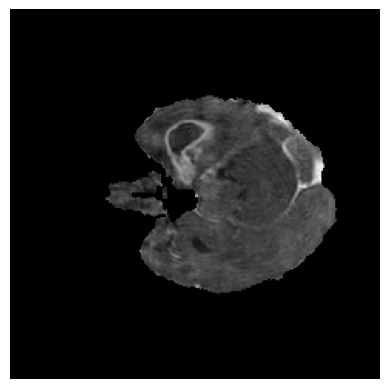

In [7]:
show_slice(nib.load(Path(RAW_DIR) / "BraTS20_Training_001" / "BraTS20_Training_001_t1ce.nii").get_fdata(), 50)

subject_dir = Path(RAW_DIR)/ "BraTS20_Training_001"
flair_path = subject_dir / "BraTS20_Training_001_flair.nii"

if not flair_path.exists():
    raise FileNotFoundError(f"❌ File not found: {flair_path}")

# Load MRI volume
img = nib.load(flair_path)
volume = img.get_fdata()
output_gif = "../visualization/flair_animation.gif"
# create_gif_from_volume(volume, output_gif, axis=2, fps=8)
# Image(filename=output_gif)